In [19]:
import wandb
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-paper')

api = wandb.Api()
entity = "joasiee"
optims = ["GOMEA", "AdaptiveStochasticGradientDescent"]

def get_runs(project, filters={}):
    return api.runs(entity + "/" + project, filters=filters)

def get_finished_run_data(runs):
    names, configs, histories = [], [], []
    for run in runs:
        if run.state == "finished":
            names.append(run.name)
            configs.append(
                {k: v for k, v in run.config.items()
                 if not k.startswith('_')})
            history = run.history()
            histories.append(history)
    return names, configs, histories

In [26]:
def plot_sampling_p_exp(project):
    runs = get_runs(project)
    _, configs, histories = get_finished_run_data(runs)
    results = {}

    for i, config in enumerate(configs):
        sp = config["SamplingPercentage"]
        if sp not in results:
            results[sp] = []
        results[sp].append(histories[i].iloc[-1]["R0/metric"])

    means = [np.mean(result) for result in results.values()]
    sps = [float(sp) for sp in results.keys()]

    plt.figure(figsize=(8,6))
    plt.scatter(sps, means)

wandb: WARNING A graphql request initiated by the public wandb API timed out (timeout=9 sec). Create a new API with an integer timeout larger than 9, e.g., `api = wandb.Api(timeout=19)` to increase the graphql timeout.
wandb: WARNING A graphql request initiated by the public wandb API timed out (timeout=9 sec). Create a new API with an integer timeout larger than 9, e.g., `api = wandb.Api(timeout=19)` to increase the graphql timeout.


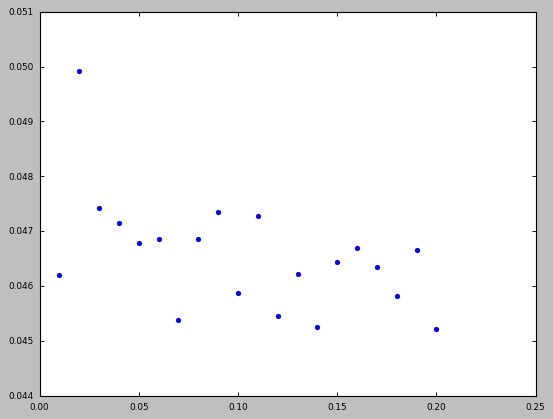

In [27]:
plot_sampling_p_exp("asgd_26_sampling")

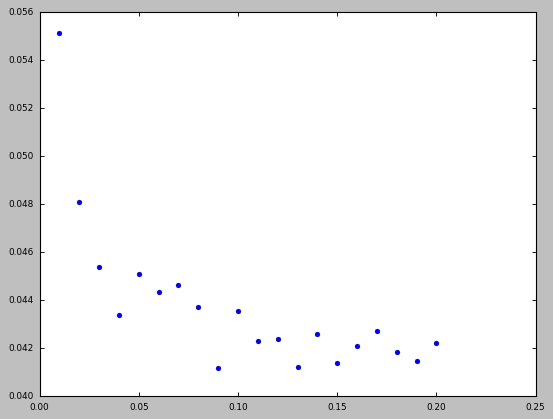